<a href="https://colab.research.google.com/github/antrecord/AI_python/blob/main/Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Credit Card analysis</h1>

In [1]:
# Импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.patches as mpatches
import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD


In [2]:
# Загрузка датасета
df = pd.read_csv('/content/creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#Анализ данных.

In [3]:
# Анализ данных
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Проверка наличия пропусков в данных
nulls = df.isnull().sum()
nulls.sum()

0

In [6]:
# Названия столбцов
df.columns.tolist()

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [7]:
# Оценим отношение классов целевой переменной
n_trans = (df['Class'].value_counts()[0] / len(df)) * 100
f_trans = (df['Class'].value_counts()[1] / len(df)) * 100

print(f'Обычные транзакции составляют {n_trans:.4f} % данных')
print(f'Мошеннические транзакции составляют {f_trans:.4f} % данных')

Обычные транзакции составляют 99.8273 % данных
Мошеннические транзакции составляют 0.1727 % данных


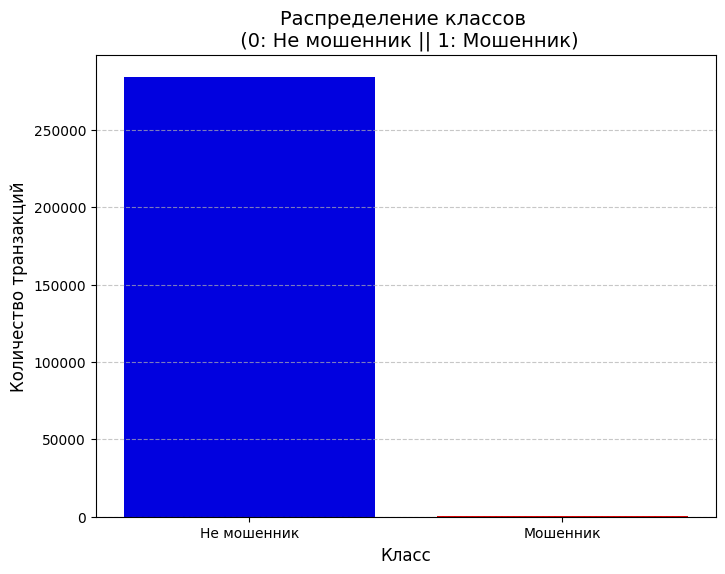

In [8]:
colors = ["#0101DF", "#DF0101"]

# Строим гистограмму целевой переменной
plt.figure(figsize=(8, 6))  # Устанавливаем размер графика
plt.title('Распределение классов \n (0: Не мошенник || 1: Мошенник)', fontsize=14)
plt.bar(df['Class'].value_counts().index, df['Class'].value_counts(), color=colors)
plt.xticks([0, 1], ['Не мошенник', 'Мошенник'])  # Переименовываем ось X
plt.xlabel('Класс', fontsize=12)
plt.ylabel('Количество транзакций', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Добавляем сетку по оси Y
plt.show()

#Распределения time и amount.

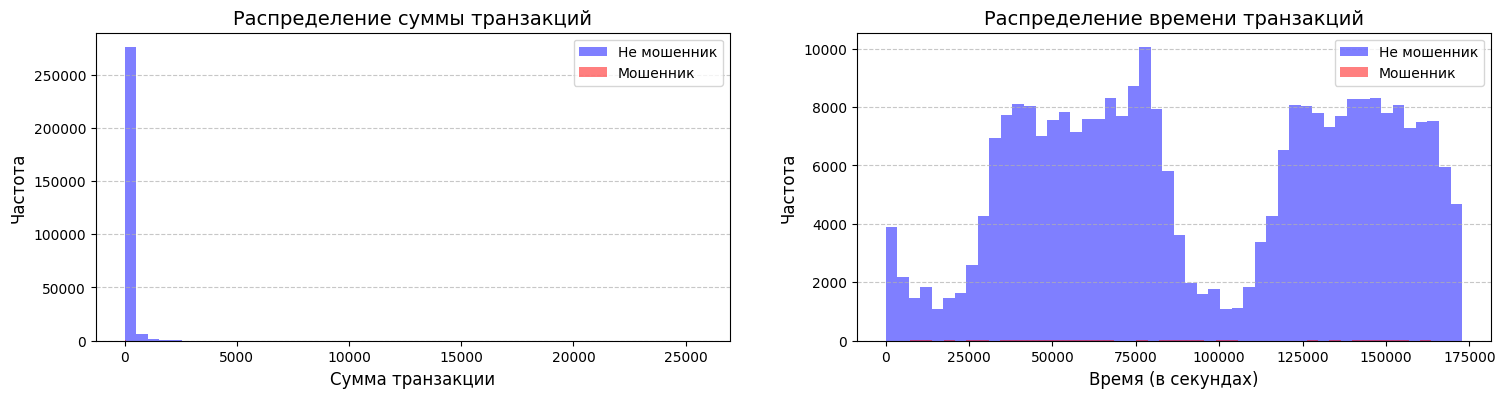

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

# Задаем значения для суммы и времени транзакций
amount_val = df['Amount']
time_val = df['Time']

# Строим график распределения суммы транзакций
ax[0].hist(amount_val[df['Class'] == 0], bins=50, alpha=0.5, color='blue', label='Не мошенник')
ax[0].hist(amount_val[df['Class'] == 1], bins=50, alpha=0.5, color='red', label='Мошенник')
ax[0].set_title('Распределение суммы транзакций', fontsize=14)
ax[0].set_xlabel('Сумма транзакции', fontsize=12)
ax[0].set_ylabel('Частота', fontsize=12)
ax[0].legend()
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Строим график распределения времени транзакций
ax[1].hist(time_val[df['Class'] == 0], bins=50, alpha=0.5, color='blue', label='Не мошенник')
ax[1].hist(time_val[df['Class'] == 1], bins=50, alpha=0.5, color='red', label='Мошенник')
ax[1].set_title('Распределение времени транзакций', fontsize=14)
ax[1].set_xlabel('Время (в секундах)', fontsize=12)
ax[1].set_ylabel('Частота', fontsize=12)
ax[1].legend()
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#Масштабирование

In [10]:
# Инициализируем RobustScaler
rob_scaler = RobustScaler()  # Менее чувствителен к выбросам, чем просто стандартизация

# Отделяем признаки и целевую переменную
X = df.drop('Class', axis=1)
y = df['Class']

# Разделяем данные на обучающую и тестовую выборки
original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=12)

# Посмотрим, какие типы данных возвращаются после разделения
rt_tmp = original_Xtrain['Amount']
print(f'Тип данных original_Xtrain["Amount"] {type(rt_tmp)}')
print(f'Тип данных original_Xtrain["Amount"].values {type(rt_tmp.values)}')
print(f'Данные original_Xtrain["Amount"].values {rt_tmp.values}')
print(f'Тип данных original_Xtrain["Amount"].values.reshape(-1,1) {type(rt_tmp.values.reshape(-1,1))}')
print(f'Данные original_Xtrain["Amount"].values.reshape(-1,1) \n{rt_tmp.values.reshape(-1,1)} \n')

# Преобразовываем Amount
original_Xtrain['scaled_amount'] = rob_scaler.fit_transform(original_Xtrain['Amount'].values.reshape(-1, 1))
original_Xtest['scaled_amount'] = rob_scaler.transform(original_Xtest['Amount'].values.reshape(-1, 1))

# Преобразовываем Time
original_Xtrain['scaled_time'] = rob_scaler.fit_transform(original_Xtrain['Time'].values.reshape(-1, 1))
original_Xtest['scaled_time'] = rob_scaler.transform(original_Xtest['Time'].values.reshape(-1, 1))

# Удаляем оригинальные колонки
original_Xtrain.drop(['Time', 'Amount'], axis=1, inplace=True)
original_Xtest.drop(['Time', 'Amount'], axis=1, inplace=True)

# Преобразуем данные в numpy массивы
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# Получаем распределение классов в обучающей выборке
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Распределение классов: \n')
print("Обучающий набор:", train_counts_label / len(original_ytrain))
print("Тестовый набор:", test_counts_label / len(original_ytest))

Тип данных original_Xtrain["Amount"] <class 'pandas.core.series.Series'>
Тип данных original_Xtrain["Amount"].values <class 'numpy.ndarray'>
Данные original_Xtrain["Amount"].values [ 50.1  336.5   57.81 ...   6.26  12.36  25.69]
Тип данных original_Xtrain["Amount"].values.reshape(-1,1) <class 'numpy.ndarray'>
Данные original_Xtrain["Amount"].values.reshape(-1,1) 
[[ 50.1 ]
 [336.5 ]
 [ 57.81]
 ...
 [  6.26]
 [ 12.36]
 [ 25.69]] 

Распределение классов: 

Обучающий набор: [0.99824881 0.00175119]
Тестовый набор: [0.99836733 0.00163267]


#Балансировка методом Random Under-Sampling

In [11]:
# Перемешаем данные перед созданием подвыборок
df = df.sample(frac=1, random_state=12)

# Отделяем мошеннические и немошеннические транзакции
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]  # Берем последние 492 транзакции

# Создаем новый сбалансированный датафрейм
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Перемешивание строк датасета
new_df = normal_distributed_df.sample(frac=1, random_state=12)

# Выводим первые строки нового датафрейма
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
261473,160034.0,-2.349340,1.512604,-2.647497,1.753792,0.406328,-2.188494,-0.686935,-0.547984,-0.099528,...,-0.088519,-0.595178,0.258148,0.061901,-0.354180,-1.152671,-0.736073,0.733703,4.90,1
14924,26221.0,-0.375141,0.338291,1.091090,-0.986371,-0.203199,0.119815,0.064036,-0.014995,-1.763552,...,0.410229,1.096523,-0.204517,-0.243478,-0.247750,-0.037646,-0.104592,0.124153,23.90,0
191690,129371.0,1.183931,3.057250,-6.161997,5.543972,1.617041,-1.848006,-1.005508,0.339937,-2.959806,...,0.109185,-0.931072,-0.064175,-0.007013,0.345419,0.064558,0.476629,0.323740,0.00,1
187355,127493.0,-2.496204,-1.347390,1.477088,-0.628305,2.103901,-1.380162,0.261785,-0.224727,-0.347748,...,-0.493579,-1.415182,0.496404,-0.386987,0.258635,0.107334,-0.680284,0.427526,16.13,0
6338,7551.0,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1


In [12]:
new_df.shape

(984, 31)

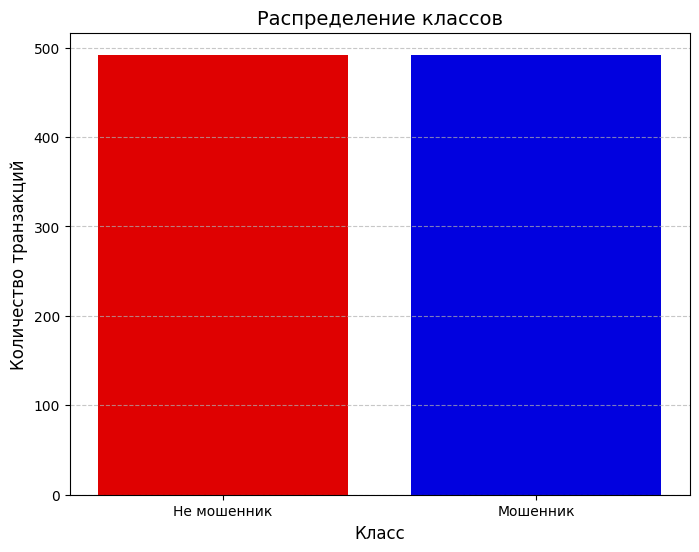

,proportion
Class,
1,0.5
0,0.5


In [13]:
# Проверяем распределение целевой переменной
plt.figure(figsize=(8, 6))
plt.title('Распределение классов', fontsize=14)
plt.bar(new_df['Class'].value_counts().index, new_df['Class'].value_counts(), color=["#0101DF", "#DF0101"])
plt.xticks([0, 1], ['Не мошенник', 'Мошенник'])  # Переименовываем ось X
plt.xlabel('Класс', fontsize=12)
plt.ylabel('Количество транзакций', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Добавляем сетку по оси Y
plt.show()

# Проверяем распределение классов
new_df['Class'].value_counts(normalize=True)

#Матрица корреляций

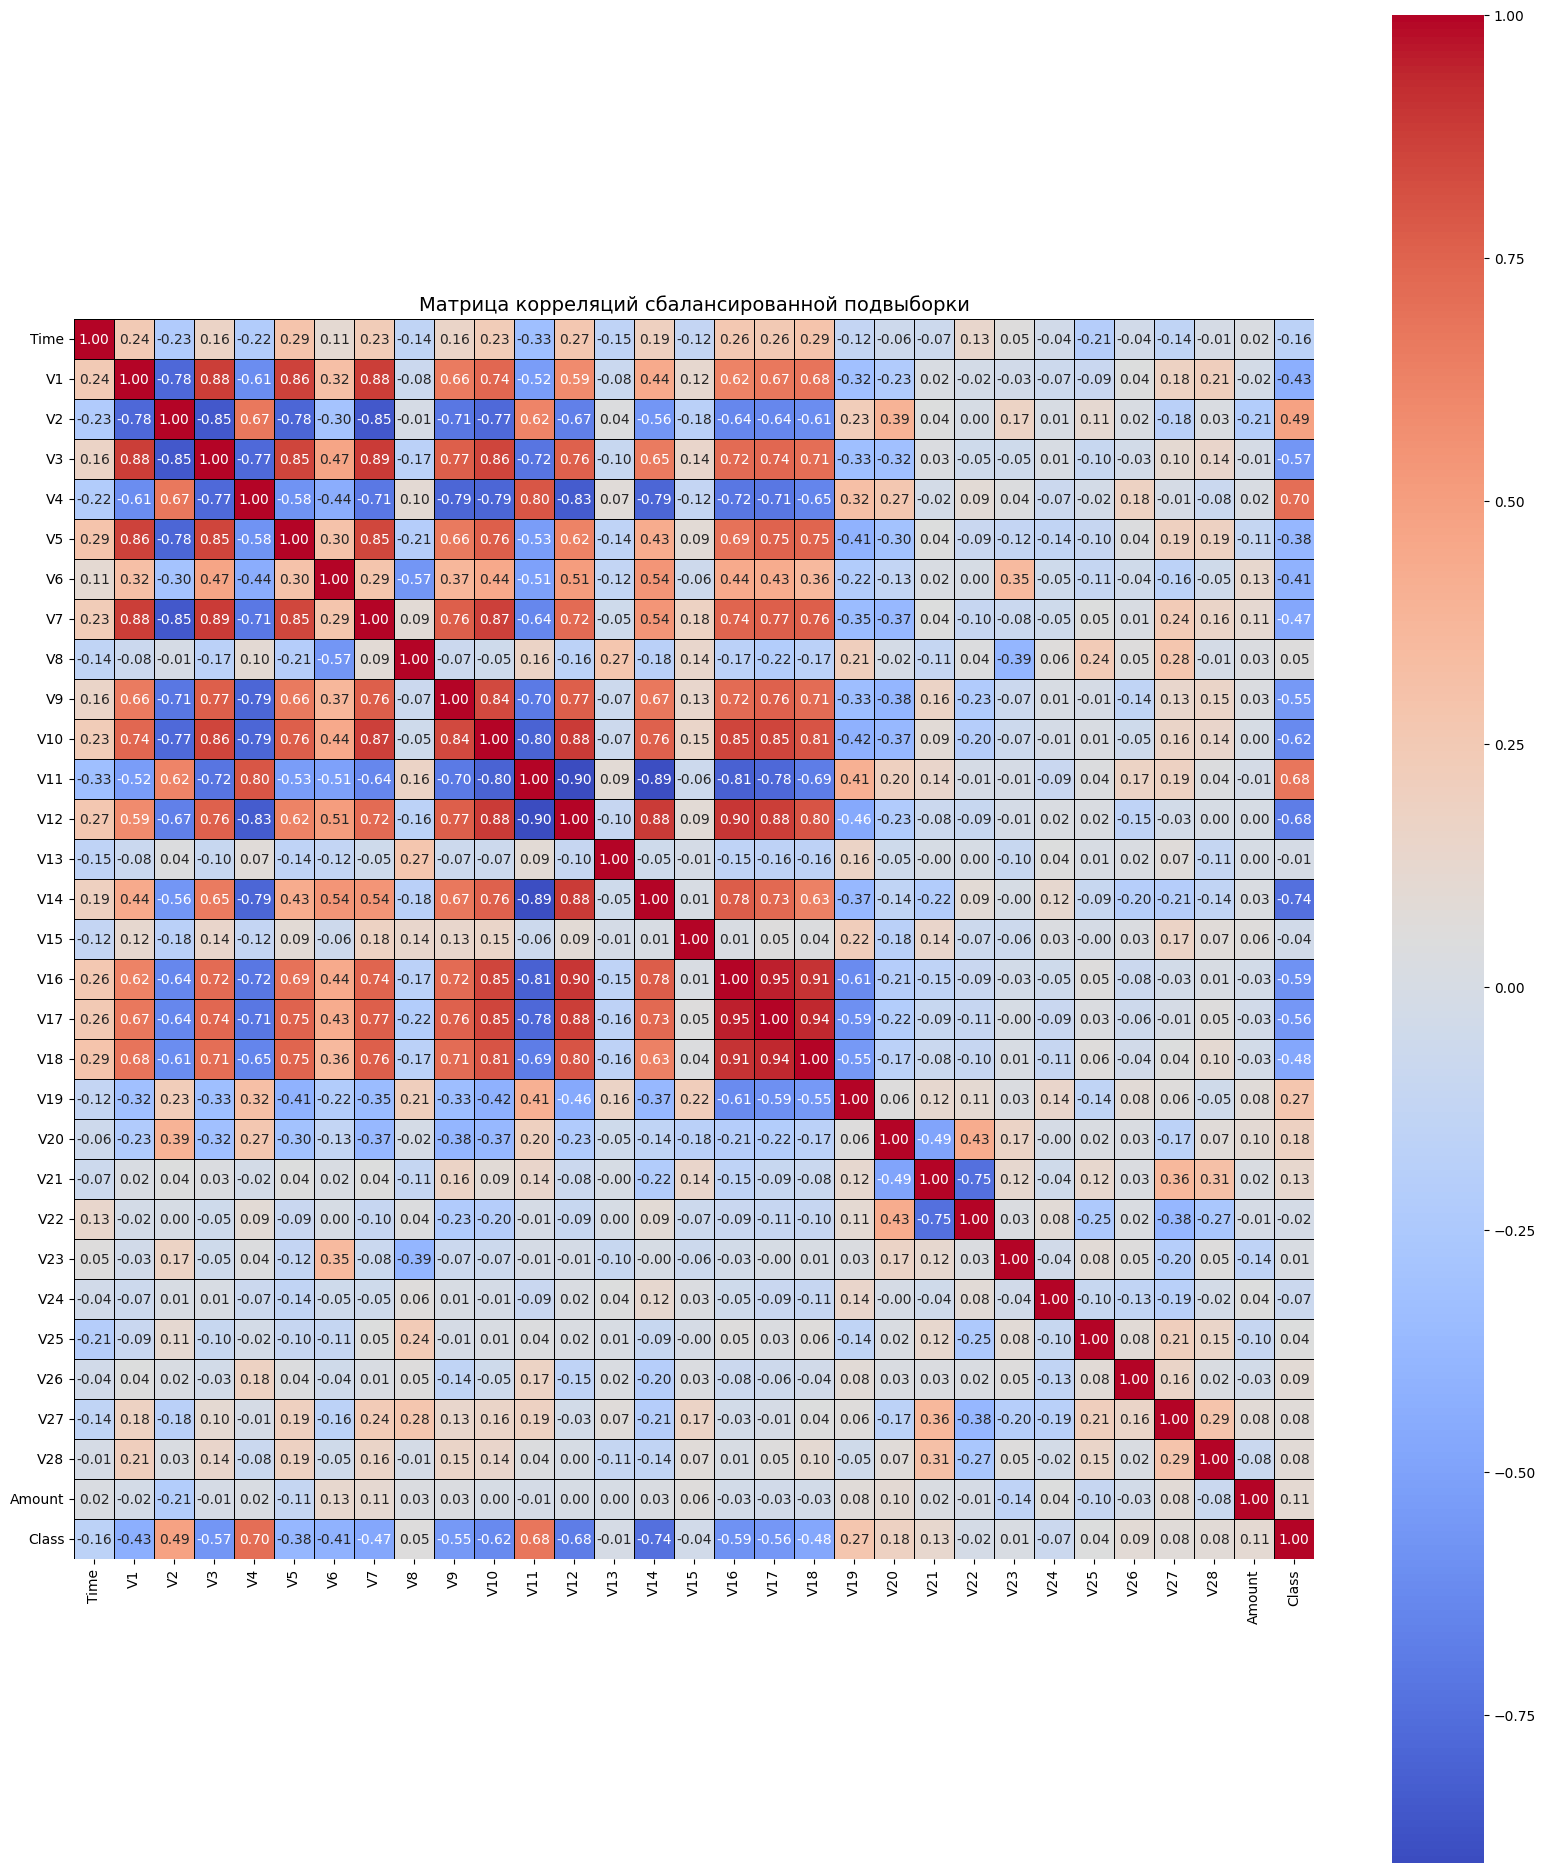

In [14]:
f, ax = plt.subplots(1, 1, figsize=(20, 24))

# Вычисляем матрицу корреляций
correlation_matrix = new_df.corr()

# Построим матрицу корреляций с использованием heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=ax, cbar=True, square=True,
            linewidths=0.5, linecolor='black')

# Устанавливаем заголовок для графика
ax.set_title('Матрица корреляций сбалансированной подвыборки', fontsize=14)

# Показываем график
plt.show()

##Выводы:

С нашей целевой переменной Class коррелируют достаточно много переменных. Есть как положительные, так и отрицательные корреляции.

#Построение Boxplot

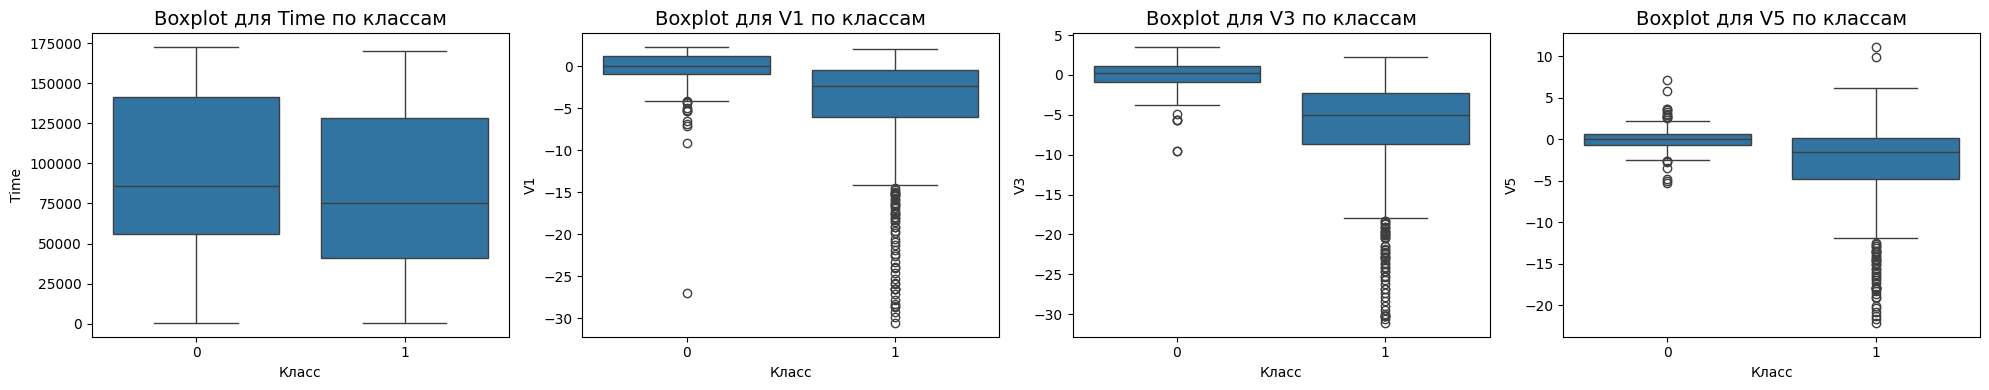

In [15]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Извлекаем корреляции с классом
class_corr = correlation_matrix['Class']

# Отбираем отрицательные корреляции
negative_corr = class_corr[class_corr < 0]

# Получаем первые 4 переменные с отрицательной корреляцией
negative_vars = negative_corr.index.tolist()[:4]

# Создаем boxplot для первых 4 переменных с отрицательной корреляцией
for i, var in enumerate(negative_vars):
    sns.boxplot(x=new_df['Class'], y=new_df[var], ax=axes[i])
    axes[i].set_title(f'Boxplot для {var} по классам', fontsize=14)
    axes[i].set_xlabel('Класс')
    axes[i].set_ylabel(var)

# Показать графики
plt.tight_layout()
plt.show()

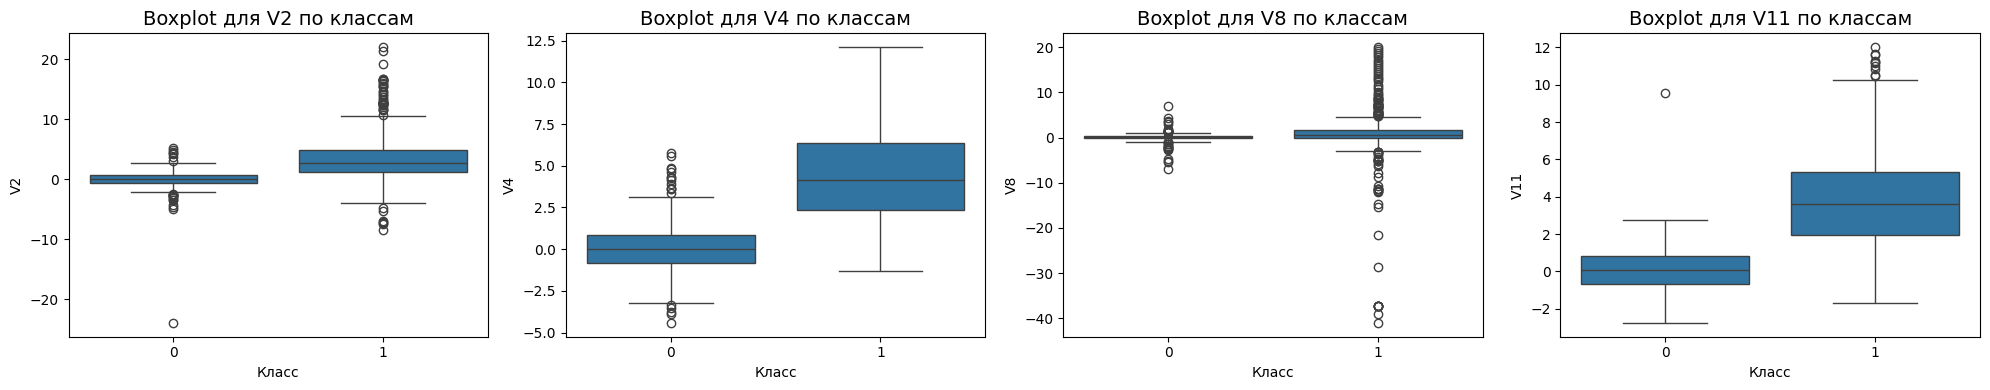

In [16]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Извлекаем корреляции с классом
class_corr = correlation_matrix['Class']

# Отбираем отрицательные корреляции
negative_corr = class_corr[class_corr > 0]

# Получаем первые 4 переменные с отрицательной корреляцией
negative_vars = negative_corr.index.tolist()[:4]

# Создаем boxplot для первых 4 переменных с отрицательной корреляцией
for i, var in enumerate(negative_vars):
    sns.boxplot(x=new_df['Class'], y=new_df[var], ax=axes[i])
    axes[i].set_title(f'Boxplot для {var} по классам', fontsize=14)
    axes[i].set_xlabel('Класс')
    axes[i].set_ylabel(var)

# Показать графики
plt.tight_layout()
plt.show()

##Выводы:

В мошеннических транзакциях (класс 1) имеются выбросы, которые могут мешать кластеризации и обучению модели

#Избавление от выбросов

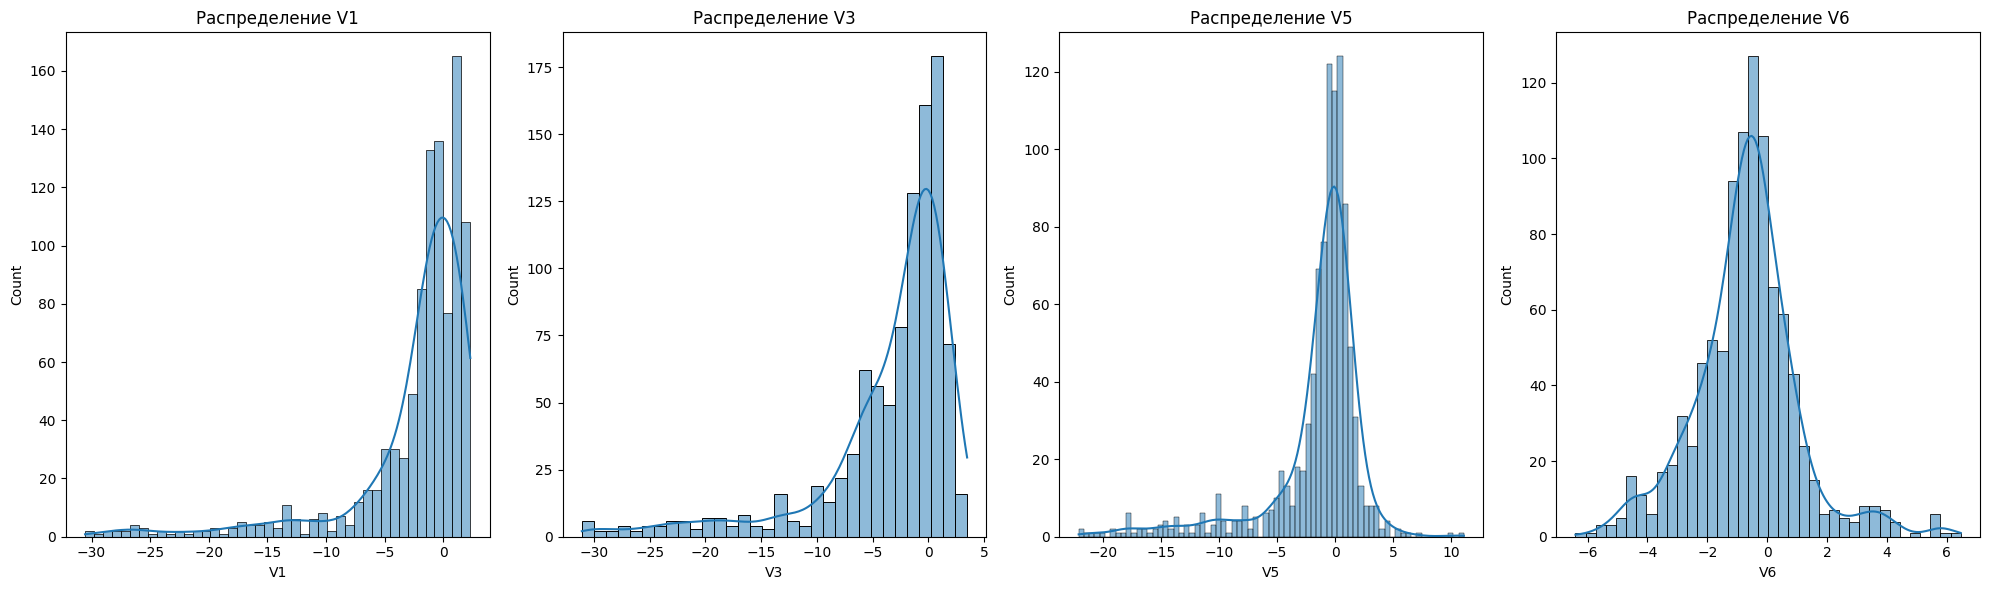

In [17]:
# Строим распределения для признаков с отрицательной корреляцией
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 6))

# Примеры признаков с отрицательной корреляцией с классом
sns.histplot(new_df['V1'], ax=ax1, kde=True)
ax1.set_title('Распределение V1')

sns.histplot(new_df['V3'], ax=ax2, kde=True)
ax2.set_title('Распределение V3')

sns.histplot(new_df['V5'], ax=ax3, kde=True)
ax3.set_title('Распределение V5')

sns.histplot(new_df['V6'], ax=ax4, kde=True)
ax4.set_title('Распределение V6')

plt.tight_layout()
plt.show()

In [18]:
# Функция для удаления выбросов по IQR для признаков
def remove_outliers_iqr(df, feature):
    data = df[feature].loc[df['Class'] == 1].values
    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    return df.drop(df[(df['Class'] == 1) & ((df[feature] > upper) | (df[feature] < lower))].index)

new_df_without_outliers = new_df
features_to_check = list(class_corr[class_corr != 0].index) # Берём признаки с ненулевой корреляцией
for feature in features_to_check:
    # Вызов функции для признаков
    new_df_without_outliers = remove_outliers_iqr(new_df_without_outliers, feature)
new_df_without_outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
261473,160034.0,-2.349340,1.512604,-2.647497,1.753792,0.406328,-2.188494,-0.686935,-0.547984,-0.099528,...,-0.088519,-0.595178,0.258148,0.061901,-0.354180,-1.152671,-0.736073,0.733703,4.90,1
14924,26221.0,-0.375141,0.338291,1.091090,-0.986371,-0.203199,0.119815,0.064036,-0.014995,-1.763552,...,0.410229,1.096523,-0.204517,-0.243478,-0.247750,-0.037646,-0.104592,0.124153,23.90,0
191690,129371.0,1.183931,3.057250,-6.161997,5.543972,1.617041,-1.848006,-1.005508,0.339937,-2.959806,...,0.109185,-0.931072,-0.064175,-0.007013,0.345419,0.064558,0.476629,0.323740,0.00,1
187355,127493.0,-2.496204,-1.347390,1.477088,-0.628305,2.103901,-1.380162,0.261785,-0.224727,-0.347748,...,-0.493579,-1.415182,0.496404,-0.386987,0.258635,0.107334,-0.680284,0.427526,16.13,0
6338,7551.0,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241445,151029.0,-3.818214,2.551338,-4.759158,1.636967,-1.167900,-1.678413,-3.144732,1.245106,-1.692541,...,0.837685,0.761712,-0.417694,-0.469712,-0.225934,0.586415,-0.348107,0.087777,10.70,1
178545,123676.0,1.689909,-2.597260,-0.019516,-1.441285,-2.263051,0.526042,-1.921240,0.274925,-0.676264,...,0.268807,0.685175,0.091288,0.698656,-0.666626,-0.167028,0.026100,0.013825,264.98,0
112840,72824.0,-1.111495,-0.257575,2.250210,1.152671,0.432904,1.254126,-0.584163,-0.609682,1.014602,...,0.862913,0.927825,-0.343058,-0.256268,-0.600742,-0.180331,0.026762,-0.358335,45.03,1
233734,147683.0,-1.412934,1.604108,-0.496913,-0.238138,1.281657,-1.040490,0.870685,0.027802,-0.593559,...,0.154497,0.348349,-0.792082,-0.624159,0.929730,0.044120,-0.648886,-0.161308,1.00,0


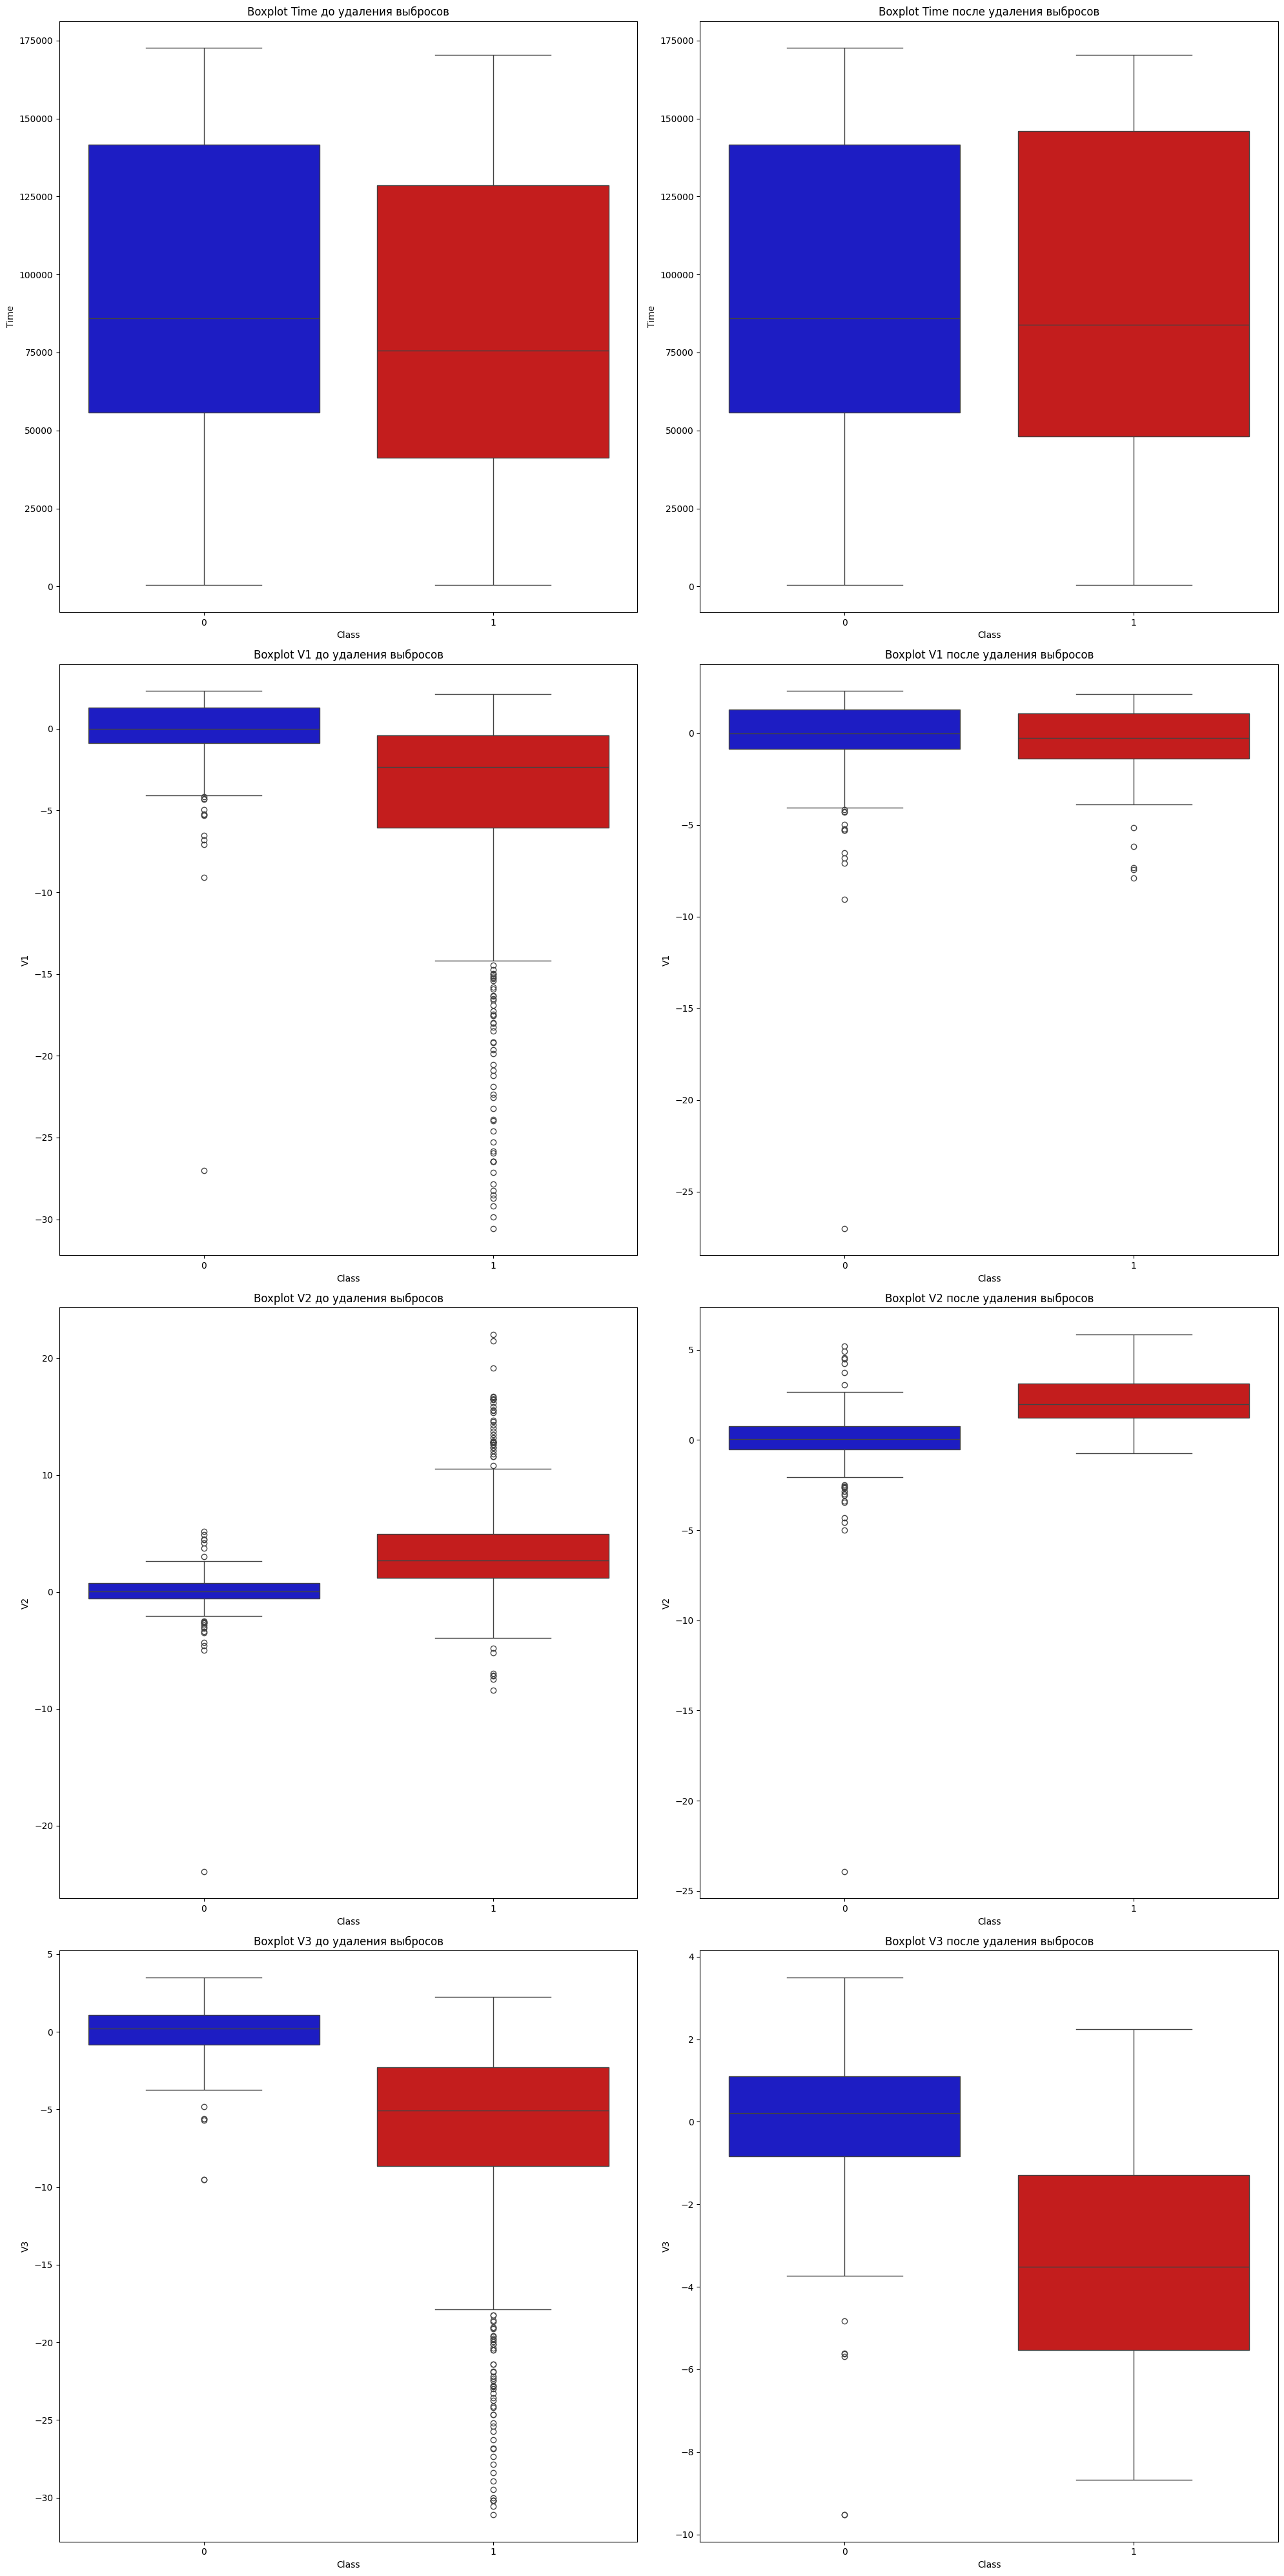

In [19]:
f, ax = plt.subplots(4, 2, figsize=(20, 40))

# Boxplots для всех признаков
for i, feature in enumerate(features_to_check):
    if i < 4:
      sns.boxplot(x=new_df['Class'], y=new_df[feature], ax=ax[i, 0], palette=colors)
      ax[i, 0].set_title(f'Boxplot {feature} до удаления выбросов')

      sns.boxplot(x=new_df_without_outliers['Class'], y=new_df_without_outliers[feature], ax=ax[i, 1], palette=colors)
      ax[i, 1].set_title(f'Boxplot {feature} после удаления выбросов')

plt.tight_layout()
plt.show()

In [20]:
# Обновляем датафрейм без выбросов
new_df = new_df_without_outliers

#Понижение размерности и кластеризация

In [29]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

X.drop(['Time', 'Amount'], axis=1, inplace=True)  # Time и Amount не коррелируют

# T-SNE алгоритм
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=12).fit_transform(X)
t1 = time.time()
print("T-SNE заняло {:.2f} сек".format(t1 - t0))

# PCA алгоритм
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=12).fit_transform(X)
t1 = time.time()
print("PCA заняло {:.2f} сек".format(t1 - t0))

# TruncatedSVD алгоритм
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, random_state=12).fit_transform(X)
t1 = time.time()
print("Truncated SVD заняло {:.2f} сек".format(t1 - t0))

T-SNE заняло 10.13 сек
PCA заняло 0.01 сек
Truncated SVD заняло 0.01 сек


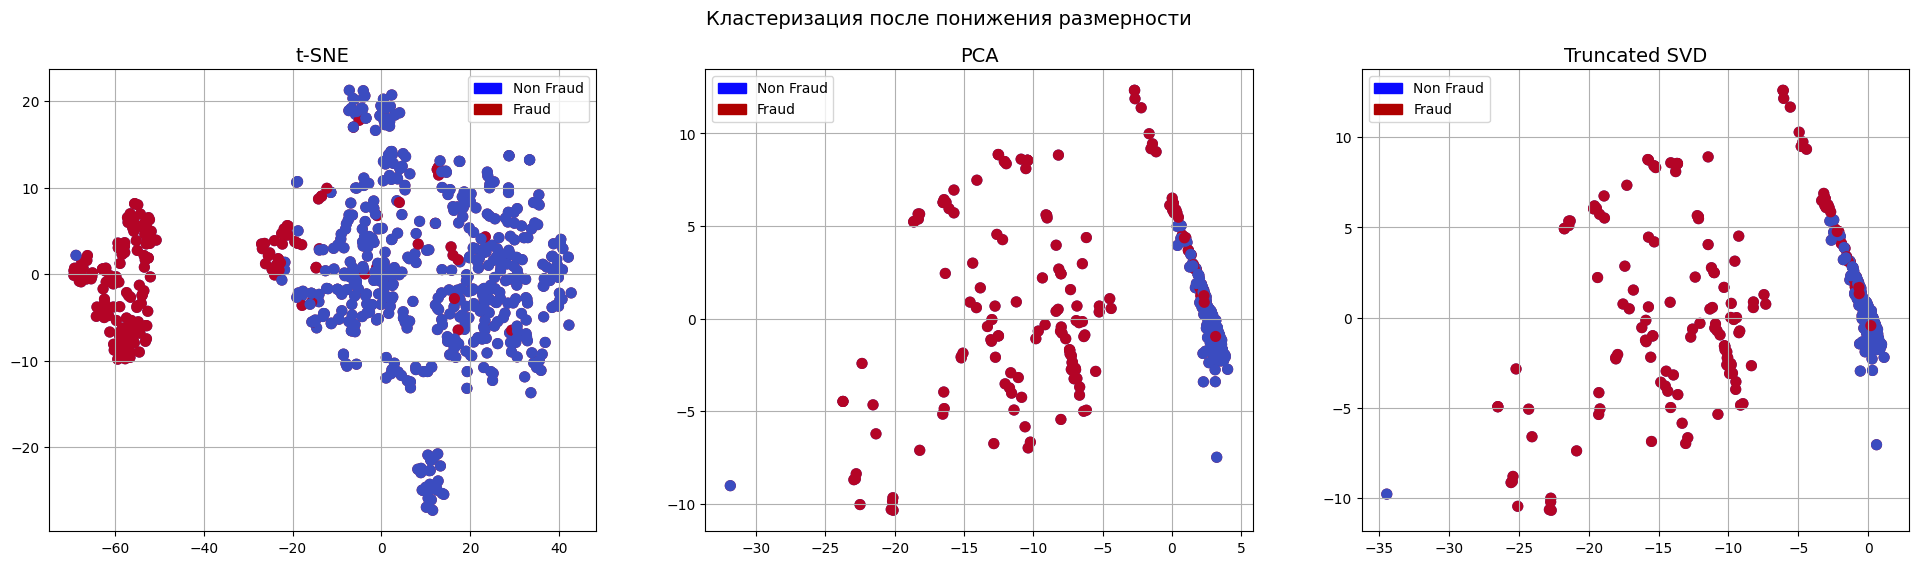

In [30]:
# Построение графиков
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))
f.suptitle('Кластеризация после понижения размерности', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='Non Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=(y == 0), cmap='coolwarm', label='Non Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], c=(y == 0), cmap='coolwarm', label='Non Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:, 0], X_reduced_svd[:, 1], c=(y == 0), cmap='coolwarm', label='Non Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:, 0], X_reduced_svd[:, 1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

plt.show()

#Выводы

<ul>
<li>Алгоритм t-SNE может довольно точно кластеризовать случаи мошенничества и не мошенничества в нашем наборе данных. </li>
<li> Классы целевой переменной однозначно разделимы, а значит мы можем строить модели! </li>
</ul>